In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import twint
import string

In [2]:
data= pd.read_json('whatsapp.json',lines=True)


In [3]:
data.shape


(5319, 36)

In [4]:
data.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1351371601388953602,1351371601388953600,2021-01-19 09:01:11 India Standard Time,2021-01-19,09:01:11,530,12206102,privacydigest,PrivacyDigest,,...,,,,,,[],,,,
1,1351371385273126912,1351371385273126912,2021-01-19 09:00:20 India Standard Time,2021-01-19,09:00:20,530,1351193920030564353,laugh_is_yum,NS,,...,,,,,,[],,,,
2,1351371322459262976,1351371322459262976,2021-01-19 09:00:05 India Standard Time,2021-01-19,09:00:05,530,2198250847,vispansolutions,Vispansolutions,,...,,,,,,[],,,,
3,1351371303975079936,1351371303975079936,2021-01-19 09:00:00 India Standard Time,2021-01-19,09:00:00,530,196494476,expressoshow,Expresso Show,,...,,,,,,[],,,,
4,1351371022835052544,1351371022835052544,2021-01-19 08:58:53 India Standard Time,2021-01-19,08:58:53,530,1323994832285638658,wsidigitech,WSI DigiTech,,...,,,,,,[],,,,


In [5]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
X=data['tweet']
X

0       WhatsApp controversy highlights growing fears ...
1       #memesdaily #memes2021 #tuesdayvibe #tuesdaymo...
2       Signal is a  Free and open source software cro...
3       Good morning! With Whatsapp updating it's priv...
4       WhatsApp en pleine opération de privacy-washin...
                              ...                        
5314    Another reason for why not to use @WhatsApp, @...
5315    @DiniHaruti Aku yakin dia sudah paham bahwa su...
5316    *🌺💠꧁ ﷽ ꧂💠🌺*  *🌙 03 Jamadi UL Sani1442🌙*       ...
5317    #WhatsApp delays new privacy policy by 3 month...
5318    @nilamadhabpanda 👇 privacy 🤷   🖕 To whatsapp p...
Name: tweet, Length: 5319, dtype: object

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk



In [8]:
#Function to clean the tweets
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check text for any urls
    nourls= " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", mess).split())
    # Check characters to see if they are in punctuation
    nopunc = [char for char in nourls if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [9]:
#Cleaning the tweets
no_urls=[]
no_punc=[]
final_list=[]
for tweet in X:
    final_list.append(text_process(tweet))
    
        

   
    
    

In [10]:
#Final list of tweets after cleaning
tweet_list=[]
for i in range(len(final_list)):
    tweet_list.append(" ".join(final_list[i]))

print(tweet_list)

['WhatsApp controversy highlights growing fears data privacyDW Many users abandoned WhatsApp service changed privacy policy Worries data could end FB driving competitors pushing superior data protection', 'memesdaily memes2021 tuesdayvibe tuesdaymotivations memes2021 sagarcasm HaramiParindey swatic12 GaurangBhardwa1 AksharPathak people believing whatsapp privacy policy even giving safai Whatsapp privacy policy', 'Signal Free open source software crossplatform encrypted messaging service developed Signal Foundation Signal Messenger signalapp WhatsappPrivacy WhatsappNewPolicy WhatsApp', 'Good morning Whatsapp updating privacy policy switched Telegram Signal experience ExpressoShow', 'WhatsApp en pleine opration de privacywashing digitalmarketing marketingnumerique', 'Facebook wont explain ruining WhatsApp privacy', 'SwatiIKR High court say problems whatsapp privacy dont use Whatsapp never forced use', 'WhatsappPrivacy policy amp ArnabPartho leaks one missing good days secure BlackBerry m

In [12]:
# Performing Sentiment Analysis
positive=0
negative=0
neutral=0
negative_list=[]
neutral_list=[]
positive_list=[]

polarity_list=[]
for tweet in tweet_list:
    
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg=score["neg"]
    pos=score['pos']
    neu=score['neu']
    polarity_list.append([pos,neg,neu])
    if neg>pos:
        negative_list.append(tweet)
        negative+=1
    elif pos>neg:
        positive_list.append(tweet)
        positive+=1
    elif pos==neg:
        neutral_list.append(tweet)
        neutral+=1
positive=(positive/len(X))*100
negative=(negative/len(X))*100
neutral=(neutral/len(X))*100
columns=['Positive','Negative','Neutral']
polarity_df=pd.DataFrame(polarity_list,columns=columns)

In [26]:
#Applying text blob to the tweets
sentiment_objects=[TextBlob(tweet) for tweet in tweet_list]

sentiment_values=[[tweet.sentiment.polarity,tweet] for tweet in sentiment_objects]
sentiment_df=pd.DataFrame(data=sentiment_values,columns=['Polarity','Tweet'])


      Polarity                                              Tweet
0     0.600000  (W, h, a, t, s, A, p, p,  , c, o, n, t, r, o, ...
1     0.000000  (m, e, m, e, s, d, a, i, l, y,  , m, e, m, e, ...
2     0.166667  (S, i, g, n, a, l,  , F, r, e, e,  , o, p, e, ...
3     0.700000  (G, o, o, d,  , m, o, r, n, i, n, g,  , W, h, ...
4     0.000000  (W, h, a, t, s, A, p, p,  , e, n,  , p, l, e, ...
...        ...                                                ...
5314 -0.200000  (A, n, o, t, h, e, r,  , r, e, a, s, o, n,  , ...
5315  0.000000  (D, i, n, i, H, a, r, u, t, i,  , A, k, u,  , ...
5316  0.000000  (0, 3,  , J, a, m, a, d, i,  , U, L,  , S, a, ...
5317  0.136364  (W, h, a, t, s, A, p, p,  , d, e, l, a, y, s, ...
5318  0.000000  (n, i, l, a, m, a, d, h, a, b, p, a, n, d, a, ...

[5319 rows x 2 columns]


In [14]:
#Function to create a wordcloud of the tweets
def create_wordcloud(text):
     mask = np.array(Image.open('cloud.jfif'))
     stopwords = set(STOPWORDS)
     wc = WordCloud(background_color='white',
     mask = mask,
     max_words=3000,
     stopwords=stopwords,
     repeat=True)
     wc.generate(str(text))
     wc.to_file('wc.jfif')
     print('Word Cloud Saved Successfully')
     path='wc.jfif'
     display(Image.open(path))

    

Word Cloud Saved Successfully


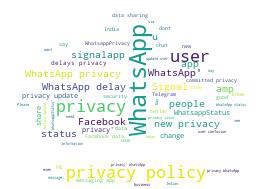

In [15]:
create_wordcloud(positive_list)

Word Cloud Saved Successfully


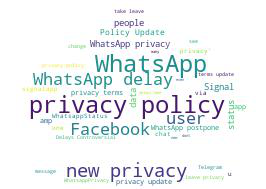

In [16]:
create_wordcloud(negative_list)

Word Cloud Saved Successfully


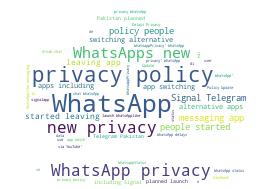

In [17]:
create_wordcloud(neutral_list)

array([[<AxesSubplot:title={'center':'Positive'}>,
        <AxesSubplot:title={'center':'Negative'}>],
       [<AxesSubplot:title={'center':'Neutral'}>, <AxesSubplot:>]],
      dtype=object)

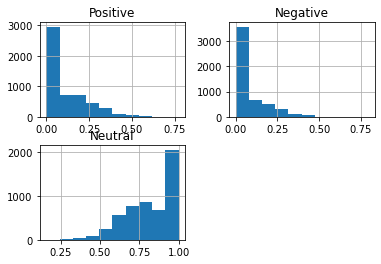

In [28]:
polarity_df.hist()

array([[<AxesSubplot:title={'center':'Polarity'}>]], dtype=object)

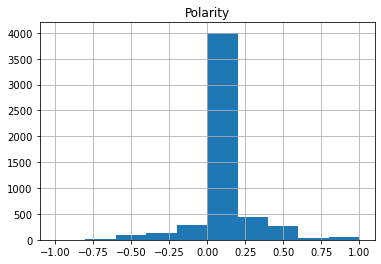

In [34]:

sentiment_df.hist()

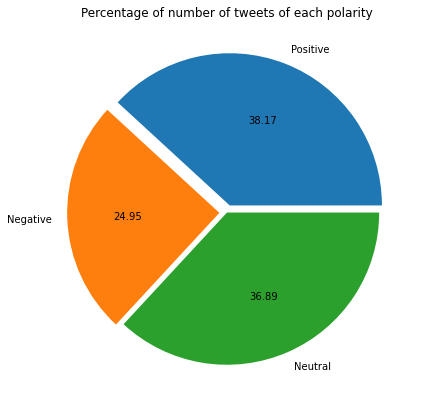

In [23]:
#Pie chart to show the percentage of the three polarities
polarity=[positive,negative,neutral]
labels=['Positive','Negative','Neutral']
explode=(0.05,0.05,0)
fig=plt.figure(figsize=(10,7))
plt.pie(polarity,labels=labels,explode=explode,autopct='%.2f')
plt.title('Percentage of number of tweets of each polarity')
plt.show()

In [24]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tweet_list,(2,2),20)
n2_bigrams

[('privacy policy', 1693),
 ('whatsapp privacy', 845),
 ('new privacy', 773),
 ('whatsapp delays', 398),
 ('whatsapps new', 284),
 ('signal telegram', 278),
 ('messaging app', 236),
 ('policy update', 196),
 ('delays privacy', 179),
 ('policy people', 171),
 ('privacy update', 170),
 ('privacy whatsapp', 165),
 ('whatsapp status', 163),
 ('people started', 162),
 ('apps including', 160),
 ('alternative apps', 160),
 ('started leaving', 159),
 ('leaving app', 159),
 ('app switching', 159),
 ('switching alternative', 159)]